In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('customer_data.csv')

In [3]:
X = df[['Age', 'Income']].values

In [5]:
# Preprocess data
X = df[['Age', 'Income']].values
import warnings
warnings.filterwarnings('ignore')

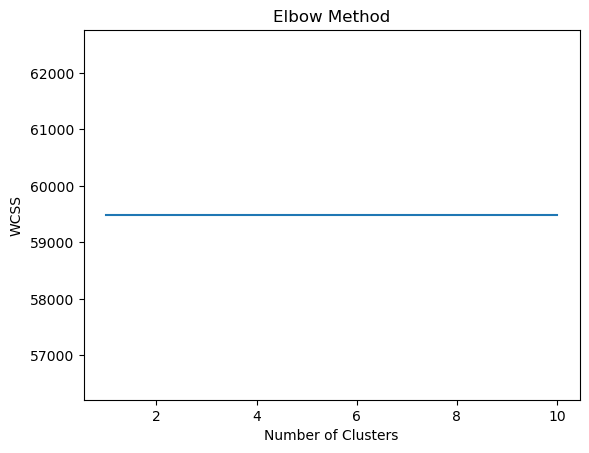

In [6]:
# Determine optimal number of clusters using elbow method
import os
os.environ['OMP_NUM_THREADS'] ='1'
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=3, init='k-means++',n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
# Apply K-means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

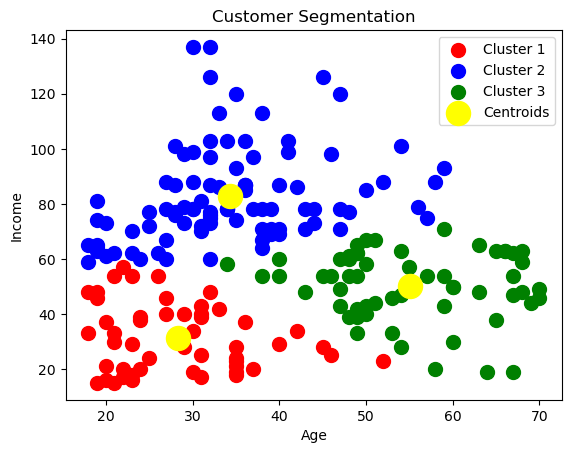

In [8]:
# Visualize clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()